In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report

from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sns.set_style('whitegrid')


In [2]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
columns = df.columns

In [7]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print()

class
e    4208
p    3916
Name: class, dtype: int64

cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

cap-surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

bruises
f    4748
t    3376
Name: bruises, dtype: int64

odor
n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

gill-attachment
f    7914
a     210
Name: gill-attachment, dtype: int64

gill-spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64

gill-size
b    5612
n    2512
Name: gill-size, dtype: int64

gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

stalk-shape
t    4608
e    3516
Name: stalk-shape, dtype: int64

stalk-root
b 

In [8]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['class'] = LE.fit_transform(df['class'])
df['class']

0       1
1       0
2       0
3       1
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      0
13      1
14      0
15      0
16      0
17      1
18      1
19      1
20      0
21      1
22      0
23      0
24      0
25      1
26      0
27      0
28      0
29      0
       ..
8094    0
8095    1
8096    0
8097    1
8098    1
8099    0
8100    0
8101    1
8102    0
8103    0
8104    0
8105    0
8106    0
8107    0
8108    1
8109    0
8110    0
8111    0
8112    0
8113    1
8114    1
8115    0
8116    1
8117    1
8118    1
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [9]:
col = df.columns
df2 = df
df2[col] = df[columns].apply(lambda col: LE.fit_transform(col))

In [10]:
df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:
x = df2.drop(['class'], axis = 1)
y = df2['class']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 25)

# Logistic Regression

In [13]:
LR = LogisticRegression()
df_lr = LR.fit(x_train, y_train)
y_pred_lr = df_lr.predict(x_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr))
print(acc_lr)
print(cm_lr)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1261
           1       0.95      0.94      0.95      1177

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438

0.9495488105004102
[[1204   57]
 [  66 1111]]


C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


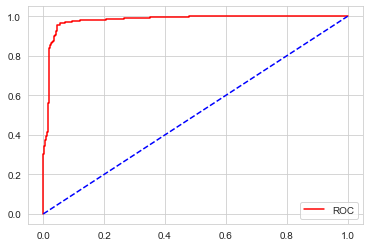

In [14]:
#AUC Curve
y_pred_proba = df_lr.predict_proba(x_test)[::,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,color='r',label="ROC")
plt.plot([0,1],[0,1],color='b',linestyle='--')

plt.legend(loc=4)
plt.show()

# Decision Tree

In [15]:
model_dte = DecisionTreeClassifier(random_state = 25)
model_dte.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=25, splitter='best')

In [16]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 20),
    'min_samples_leaf': range(50, 100, 20),
    'min_samples_split': range(50, 200, 20),
    'criterion': ["entropy", 'gini']
}

n_folds = 5

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model_dte, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)
print("best accuracy", grid_search.best_score_)

grid_search.best_params_

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best accuracy 0.9753785823699713


[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:  2.5min finished


{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [17]:
best_model_dte = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 25,
                                  max_depth=7, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
best_model_dte.fit(x_train, y_train)
y_pred_bdte = best_model_dte.predict(x_test)
acc_bdte = accuracy_score(y_test, y_pred_bdte)
cm_bdte = confusion_matrix(y_test, y_pred_bdte)
print(classification_report(y_test, y_pred_bdte))
print(cm_bdte)
print(acc_bdte)
print(best_model_dte.score(x_train, y_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1261
           1       1.00      0.99      0.99      1177

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

[[1258    3]
 [  15 1162]]
0.992616899097621
0.9940204009848751


# KNN

In [18]:
NNH = KNeighborsClassifier(weights = 'uniform',metric='euclidean')

# Call Nearest Neighbour algorithm
NNH.fit(x_train, y_train)

y_pred=NNH.predict(x_test)

acc_NNH=metrics.accuracy_score(y_test,y_pred)
print(acc_NNH)

cm_NNH=metrics.confusion_matrix(y_test,y_pred)
print(cm_NNH)

cr_NNH=metrics.classification_report(y_test,y_pred)
print(cr_NNH)

print(NNH.score(x_train, y_train))

0.9995898277276456
[[1260    1]
 [   0 1177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1261
           1       1.00      1.00      1.00      1177

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

0.9992965177629265


# Naive Bayes

In [19]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)

y_predbnb = bnb.predict(x_test)

acc_bnb = metrics.accuracy_score(y_test,y_predbnb)
print(acc_bnb)

cm_bnb=metrics.confusion_matrix(y_test,y_predbnb)
print(cm_bnb)

cr_bnb=metrics.classification_report(y_test,y_predbnb)
print(cr_bnb)

print(bnb.score(x_train, y_train))

0.8445447087776866
[[1196   65]
 [ 314  863]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1261
           1       0.93      0.73      0.82      1177

    accuracy                           0.84      2438
   macro avg       0.86      0.84      0.84      2438
weighted avg       0.86      0.84      0.84      2438

0.8454097784030953


# Random Forest 

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test) 
print(metrics.confusion_matrix(y_test, y_pred))
acc_r = metrics.accuracy_score(y_test,y_pred)
acc_r

[[1261    0]
 [   0 1177]]


1.0

In [21]:
print('Accuracy for Logistic Regression ', acc_lr)
print('Accuracy for Decision Tree - Entropy ', acc_bdte)
print('Accuracy for KNN - Euclidean ', acc_NNH)
print('Accuracy for Navie Bayes - Bernoulli ', acc_bnb)
print('Accuracy for Random Forest ', acc_r)

Accuracy for Logistic Regression  0.9495488105004102
Accuracy for Decision Tree - Entropy  0.992616899097621
Accuracy for KNN - Euclidean  0.9995898277276456
Accuracy for Navie Bayes - Bernoulli  0.8445447087776866
Accuracy for Random Forest  1.0


# Gradient Booster

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(x_train, y_train)

y_gbcl=gbcl.predict(x_test)
metrics.accuracy_score(y_test, y_gbcl)

0.9995898277276456